# 1. 2D Patch Extraction from 3D Volume

In [1]:
# Turn off warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import os

In [3]:
filePath_noisy = '/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/seismic/InfoP_noisy.segy'
filePath_noiseless = '/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/seismic/InfoP_noiseless.segy'

### Load Noisy Dataset

In [4]:
with segyio.open(filePath_noisy, mode = "r", iline = 189, xline = 193) as s:
    cubeNoisy = segyio.cube(s)

In [5]:
cubeNoisy.shape

(351, 4097, 1751)

### Load Noiseless Dataset

In [6]:
with segyio.open(filePath_noiseless, mode = "r", iline = 189, xline = 193) as s:
    cubeNoiseless = segyio.cube(s)

In [7]:
cubeNoiseless.shape

(351, 4097, 1751)

---

In [8]:
# Select a random value for the inline, crossline, time slice
iline = np.random.randint(0, cubeNoisy.shape[0])
xline = np.random.randint(0, cubeNoisy.shape[1])
time = np.random.randint(0, cubeNoisy.shape[2])

---

In [9]:
amplitude_max = np.percentile(cubeNoisy, 98)
amplitude_max

7.233442306518555

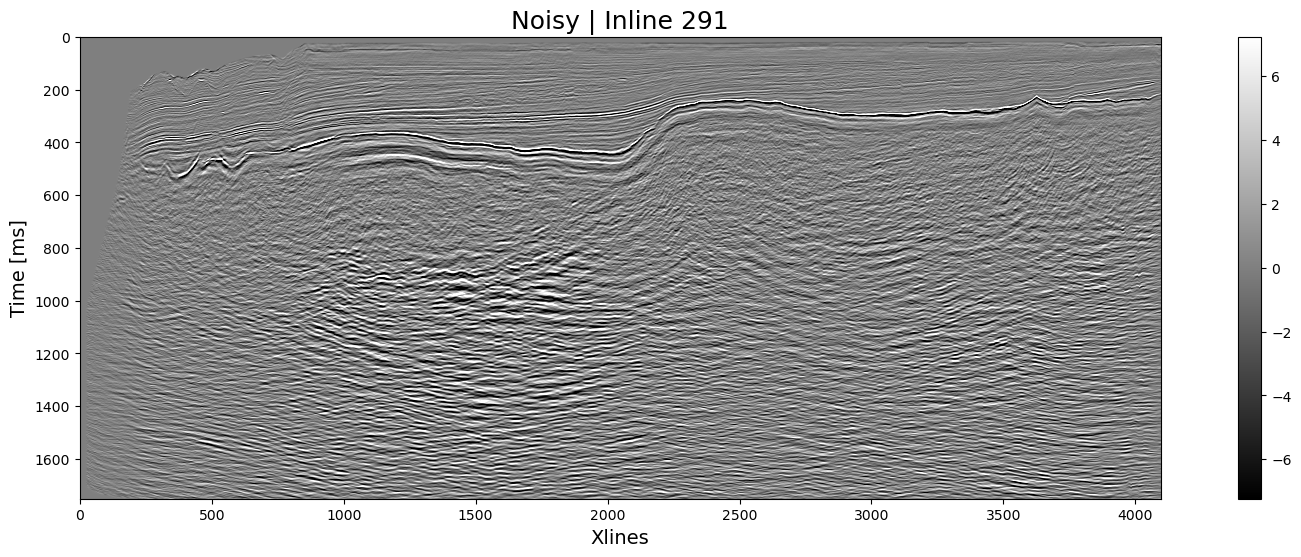

In [10]:
# Visualize the inline
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[iline, :, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %iline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/Noisy_Inline_%d.png' %iline)
plt.show()

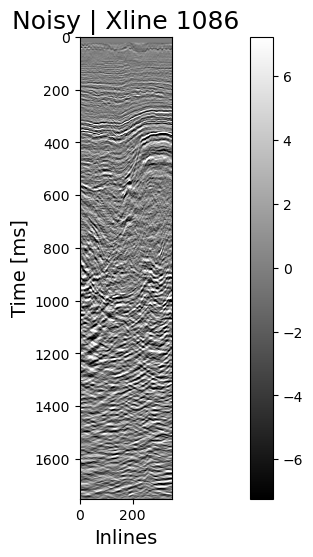

In [11]:
# Visualize the crossline
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, xline, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Xline %d' %xline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/Noisy_Xline_%d.png' %xline)
plt.show()

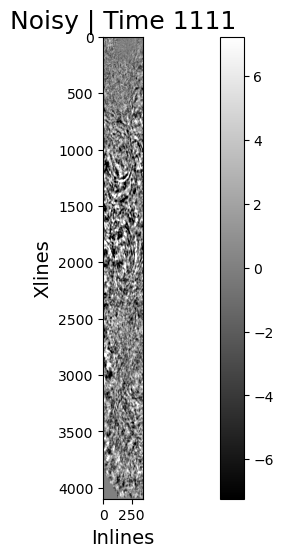

In [12]:
# Visualize the time slice
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, :, time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noisy | Time %d' %time, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/Noisy_Xline_%d.png' %time)
plt.show()

---

### Visualize Patches

In [53]:
patchSize = 256

In [54]:
iline_num_patches = cubeNoisy.shape[0] // patchSize 
xline_num_patches = cubeNoisy.shape[1] // patchSize 
time_num_patches = cubeNoisy.shape[2] // patchSize 

In [55]:
print('Number of patches in the inline direction: %d' %iline_num_patches)
print('Number of patches in the crossline direction: %d' %xline_num_patches)
print('Number of patches in the time direction: %d' %time_num_patches)

Number of patches in the inline direction: 1
Number of patches in the crossline direction: 16
Number of patches in the time direction: 6


In [56]:
total_num_iline_patches = xline_num_patches*time_num_patches*cubeNoisy.shape[0]
total_num_xline_patches = iline_num_patches*time_num_patches*cubeNoisy.shape[1]
total_num_time_patches = iline_num_patches*xline_num_patches*cubeNoisy.shape[2]

In [57]:
print('Total number of patches in the inline direction: %d' %(total_num_iline_patches))
print('Total number of patches in the crossline direction: %d' %(total_num_xline_patches))
print('Total number of patches in the time direction: %d' %(total_num_time_patches))

Total number of patches in the inline direction: 33696
Total number of patches in the crossline direction: 24582
Total number of patches in the time direction: 28016


#### Inline

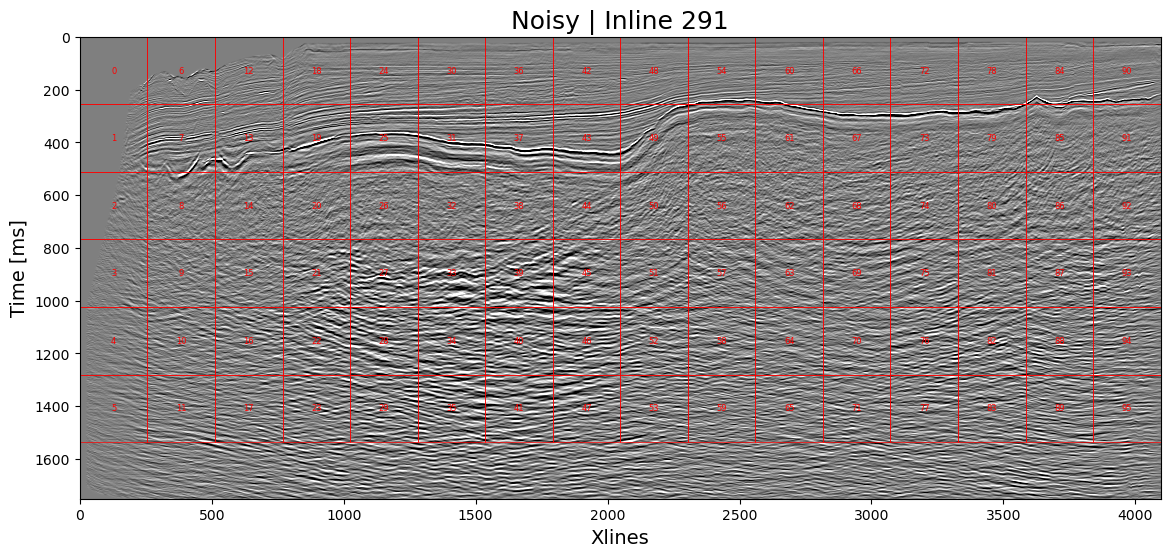

In [58]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[iline, :, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

for m in range(xline_num_patches):
    for n in range(time_num_patches):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*time_num_patches+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %iline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/2D_iline_noisyPatches.png', dpi = 500)
plt.show()

#### Xline

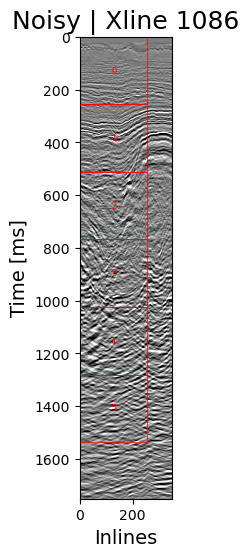

In [59]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, xline, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

for m in range(iline_num_patches):
    for n in range(time_num_patches):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*time_num_patches+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Xline %d' %xline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/2D_xline_noisyPatches.png', dpi = 500)
plt.show()

#### Time

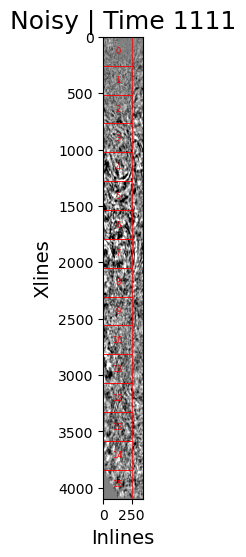

In [60]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, :, time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

for m in range(iline_num_patches):
    for n in range(xline_num_patches):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*xline_num_patches+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noisy | Time %d' %time, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/2D_time_noisyPatches.png', dpi = 500)
plt.show()

---

### Extract Patches

In [103]:
# Select a random value for the inline, crossline, time slice
random_iline = np.random.randint(0, cubeNoiseless.shape[0])
random_xline = np.random.randint(0, cubeNoiseless.shape[1])
random_time = np.random.randint(0, cubeNoiseless.shape[2])

### Noisy Volume

#### Inline

In [82]:
# Extract the individual patches for each Inline

iline_num_patches = cubeNoisy.shape[0]
xline_num_patches = cubeNoisy.shape[1] // patchSize
time_num_patches = cubeNoisy.shape[2] // patchSize

iline_noisy_patches = {}
count = 0

for i in range(iline_num_patches):
    for j in range(xline_num_patches):
        for k in range(time_num_patches):
            iline_start, iline_end = i, i + 1
            xline_start, xline_end = j * patchSize, (j + 1) * patchSize
            time_start, time_end = k * patchSize, (k + 1) * patchSize
            
            patch = cubeNoisy[iline_start:iline_end, xline_start:xline_end, time_start:time_end].squeeze()
            
            iline_noisy_patches[count] = patch
            count += 1

In [83]:
len(iline_noisy_patches)

33696

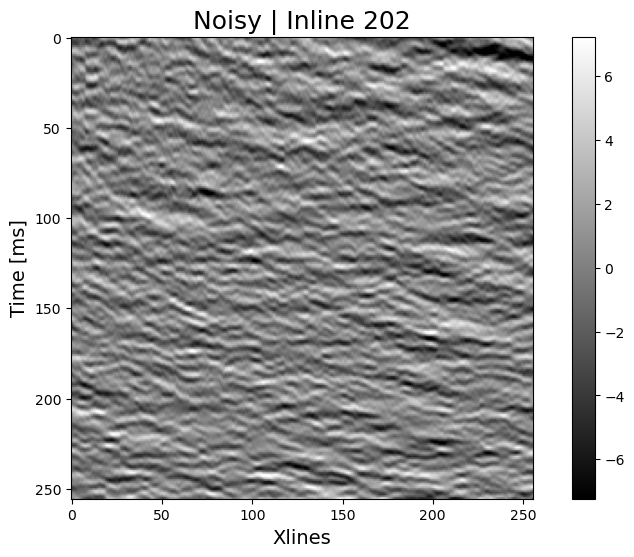

In [104]:
# Display a random single inline patch
plt.figure(figsize=(10, 6))
plt.imshow(iline_noisy_patches[random_iline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %random_iline, fontsize = 18)
plt.show()

In [93]:
# Save the individual patches as separate .npy arrays
for i in range(len(iline_noisy_patches)):
    np.save('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches/patches_size_{}/noisy/inline_2D_noisy/inline_2D_noisy_patch_{}.npy'.format(patchSize, i), iline_noisy_patches[i])

#### Xline

In [86]:
# Extract the individual patches for each Xline
iline_num_patches = cubeNoisy.shape[0] // patchSize
xline_num_patches = cubeNoisy.shape[1]
time_num_patches = cubeNoisy.shape[2] // patchSize

xline_noisy_patches = {}
count = 0

for j in range(xline_num_patches):
    for i in range(iline_num_patches):
        for k in range(time_num_patches):
            iline_start, iline_end = i * patchSize, (i + 1) * patchSize
            xline_slice = j
            time_start, time_end = k * patchSize, (k + 1) * patchSize
            
            patch = cubeNoisy[iline_start:iline_end, xline_slice:xline_slice+1, time_start:time_end].squeeze()
            
            xline_noisy_patches[count] = patch
            count += 1

In [87]:
len(xline_noisy_patches)

24582

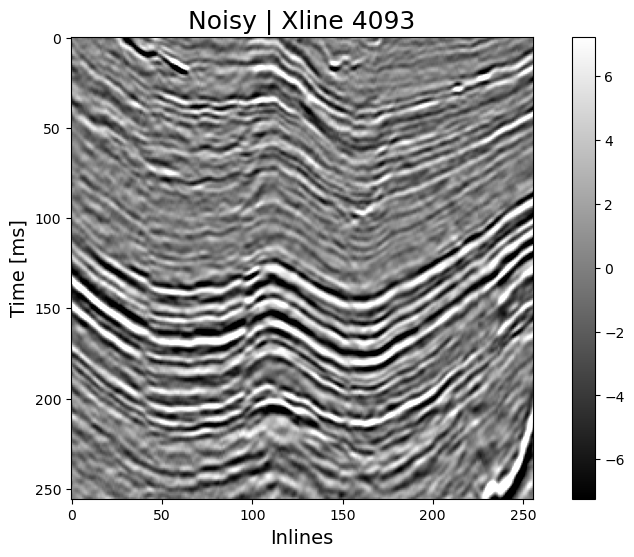

In [105]:
# Display a random single xline patch
plt.figure(figsize=(10, 6))
plt.imshow(xline_noisy_patches[random_xline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Xline %d' %random_xline, fontsize = 18)
plt.show()

In [94]:
# Save the individual patches as separate .npy arrays
for i in range(len(xline_noisy_patches)):
    np.save('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches/patches_size_{}/noisy/xline_2D_noisy/xline_2D_noisy_patch_{}.npy'.format(patchSize, i), xline_noisy_patches[i])

#### Time

In [89]:
# Extract the individual patches for each Time
iline_num_patches = cubeNoisy.shape[0] // patchSize
xline_num_patches = cubeNoisy.shape[1] // patchSize
time_num_patches = cubeNoisy.shape[2]

time_noisy_patches = {}
count = 0

for k in range(time_num_patches):
    for i in range(iline_num_patches):
        for j in range(xline_num_patches):
            iline_start, iline_end = i * patchSize, (i + 1) * patchSize
            xline_start, xline_end = j * patchSize, (j + 1) * patchSize
            time_slice = k
            
            patch = cubeNoisy[iline_start:iline_end, xline_start:xline_end, time_slice:time_slice+1].squeeze()
            
            time_noisy_patches[count] = patch
            count += 1

In [90]:
len(time_noisy_patches)

28016

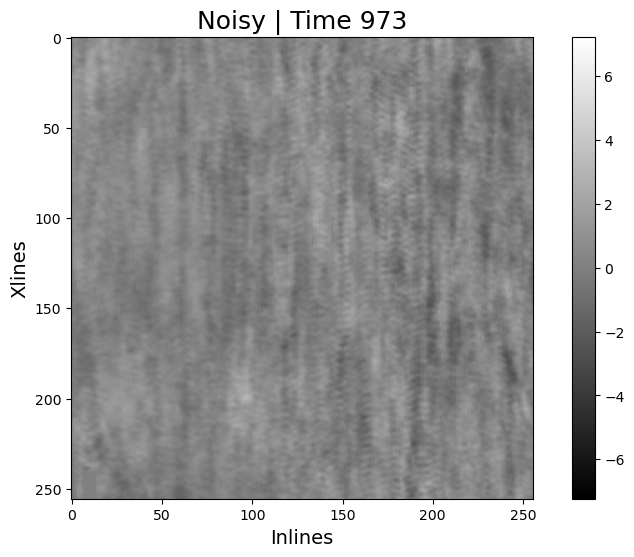

In [106]:
# Display a random single tim patch
plt.figure(figsize=(10, 6))
plt.imshow(time_noisy_patches[random_time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noisy | Time %d' %random_time, fontsize = 18)
plt.show()

In [98]:
# Save the individual patches as separate .npy arrays
for i in range(len(time_noisy_patches)):
    np.save('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches/patches_size_{}/noisy/time_2D_noisy/time_2D_noisy_patch_{}.npy'.format(patchSize, i), time_noisy_patches[i])

---

---

### Noiseless Volume

#### Inline

In [99]:
# Extract the individual patches for each Inline

iline_num_patches = cubeNoiseless.shape[0]
xline_num_patches = cubeNoiseless.shape[1] // patchSize
time_num_patches = cubeNoiseless.shape[2] // patchSize

iline_noiseless_patches = {}
count = 0

for i in range(iline_num_patches):
    for j in range(xline_num_patches):
        for k in range(time_num_patches):
            iline_start, iline_end = i, i + 1
            xline_start, xline_end = j * patchSize, (j + 1) * patchSize
            time_start, time_end = k * patchSize, (k + 1) * patchSize
            
            patch = cubeNoiseless[iline_start:iline_end, xline_start:xline_end, time_start:time_end].squeeze()
            
            iline_noiseless_patches[count] = patch
            count += 1

In [100]:
len(iline_noiseless_patches)

33696

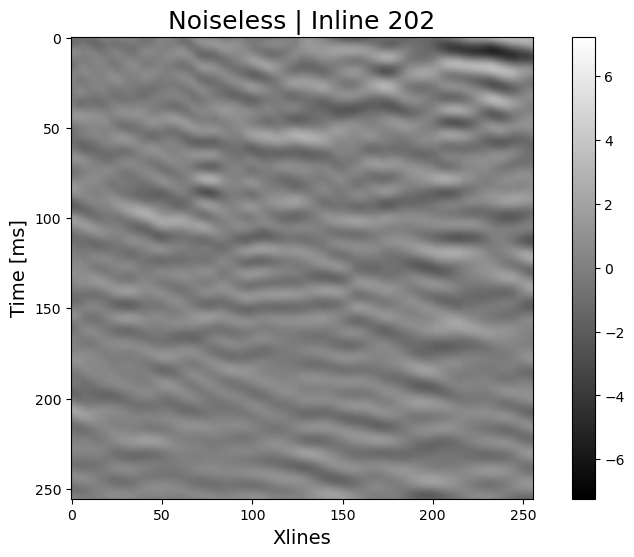

In [107]:
# Display a random single inline patch
plt.figure(figsize=(10, 6))
plt.imshow(iline_noiseless_patches[random_iline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noiseless | Inline %d' %random_iline, fontsize = 18)
plt.show()

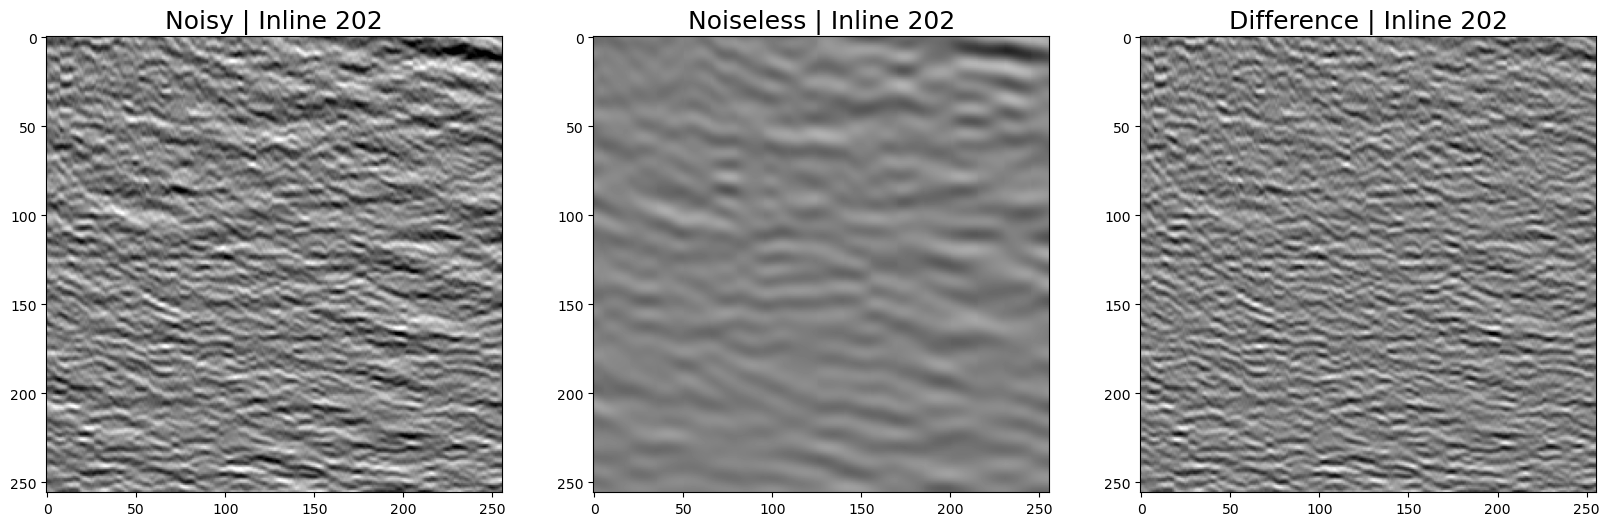

In [108]:
# Make a 1 row 3 column plot. 1st plot in the noisy inline, 2nd plot is the noiseless inline, 3rd plot is the difference between the two
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(iline_noisy_patches[random_iline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[0].set_title('Noisy | Inline %d' %random_iline, fontsize = 18)
axs[1].imshow(iline_noiseless_patches[random_iline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[1].set_title('Noiseless | Inline %d' %random_iline, fontsize = 18)
axs[2].imshow(iline_noisy_patches[random_iline].T - iline_noiseless_patches[random_iline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[2].set_title('Difference | Inline %d' %random_iline, fontsize = 18)
plt.show()

In [110]:
# Save the individual patches as separate .npy arrays
for i in range(len(iline_noiseless_patches)):
    np.save('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches/patches_size_{}/noiseless/inline_2D_noiseless/inline_2D_noiseless_patch_{}.npy'.format(patchSize, i), iline_noiseless_patches[i])

#### Xline

In [111]:
# Extract the individual patches for each Xline
iline_num_patches = cubeNoiseless.shape[0] // patchSize
xline_num_patches = cubeNoiseless.shape[1]
time_num_patches = cubeNoiseless.shape[2] // patchSize

xline_noiseless_patches = {}
count = 0

for j in range(xline_num_patches):
    for i in range(iline_num_patches):
        for k in range(time_num_patches):
            iline_start, iline_end = i * patchSize, (i + 1) * patchSize
            xline_slice = j
            time_start, time_end = k * patchSize, (k + 1) * patchSize
            
            patch = cubeNoiseless[iline_start:iline_end, xline_slice:xline_slice+1, time_start:time_end].squeeze()
            
            xline_noiseless_patches[count] = patch
            count += 1

In [112]:
len(xline_noiseless_patches)

24582

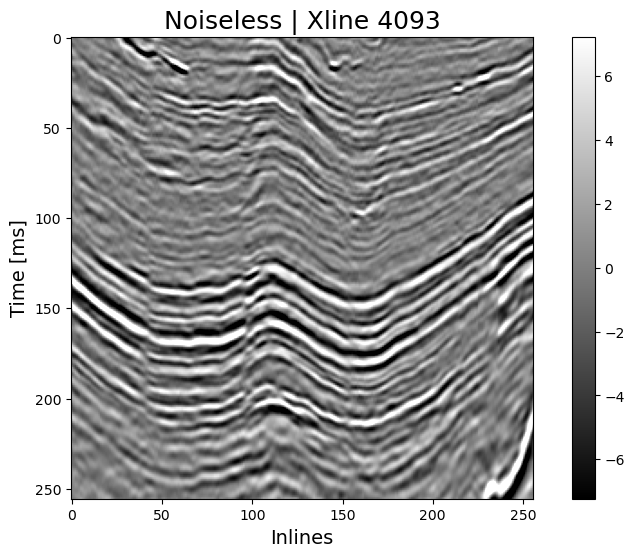

In [113]:
# Display a random single xline patch
plt.figure(figsize=(10, 6))
plt.imshow(xline_noiseless_patches[random_xline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noiseless | Xline %d' %random_xline, fontsize = 18)
plt.show()

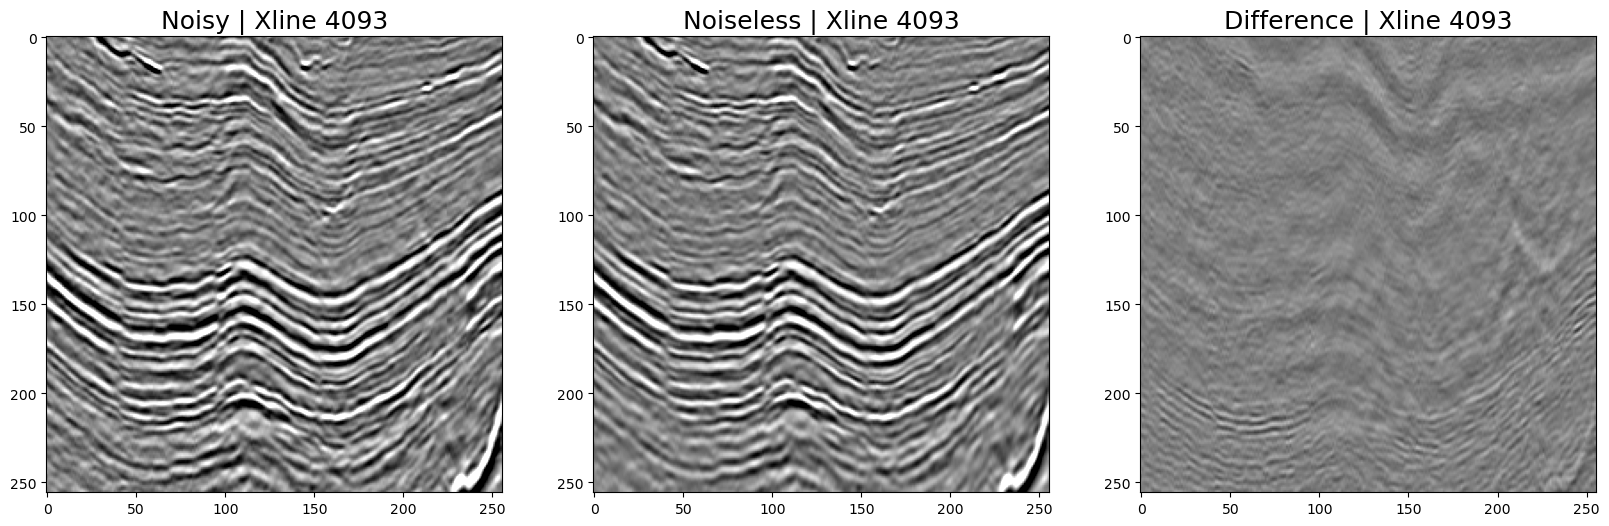

In [115]:
# Make a 1 row 3 column plot. 1st plot in the noisy inline, 2nd plot is the noiseless inline, 3rd plot is the difference between the two
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(xline_noisy_patches[random_xline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[0].set_title('Noisy | Xline %d' %random_xline, fontsize = 18)
axs[1].imshow(xline_noiseless_patches[random_xline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[1].set_title('Noiseless | Xline %d' %random_xline, fontsize = 18)
axs[2].imshow(xline_noisy_patches[random_xline].T - xline_noiseless_patches[random_xline].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[2].set_title('Difference | Xline %d' %random_xline, fontsize = 18)
plt.show()

In [118]:
# Save the individual patches as separate .npy arrays
for i in range(len(xline_noiseless_patches)):
    np.save('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches/patches_size_{}/noiseless/xline_2D_noiseless/xline_2D_noiseless_patch_{}.npy'.format(patchSize, i), xline_noiseless_patches[i])

#### Time

In [119]:
# Extract the individual patches for each Time
iline_num_patches = cubeNoiseless.shape[0] // patchSize
xline_num_patches = cubeNoiseless.shape[1] // patchSize
time_num_patches = cubeNoiseless.shape[2]

time_noiseless_patches = {}
count = 0

for k in range(time_num_patches):
    for i in range(iline_num_patches):
        for j in range(xline_num_patches):
            iline_start, iline_end = i * patchSize, (i + 1) * patchSize
            xline_start, xline_end = j * patchSize, (j + 1) * patchSize
            time_slice = k
            
            patch = cubeNoiseless[iline_start:iline_end, xline_start:xline_end, time_slice:time_slice+1].squeeze()
            
            time_noiseless_patches[count] = patch
            count += 1

In [120]:
len(time_noiseless_patches)

28016

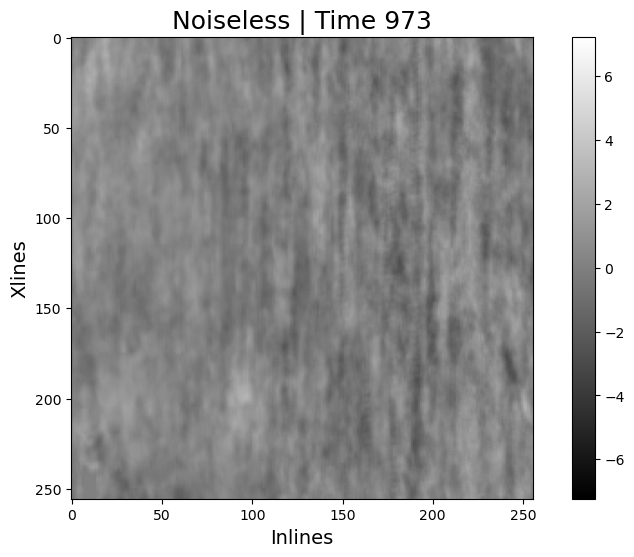

In [121]:
# Display a random single tim patch
plt.figure(figsize=(10, 6))
plt.imshow(time_noiseless_patches[random_time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noiseless | Time %d' %random_time, fontsize = 18)
plt.show()

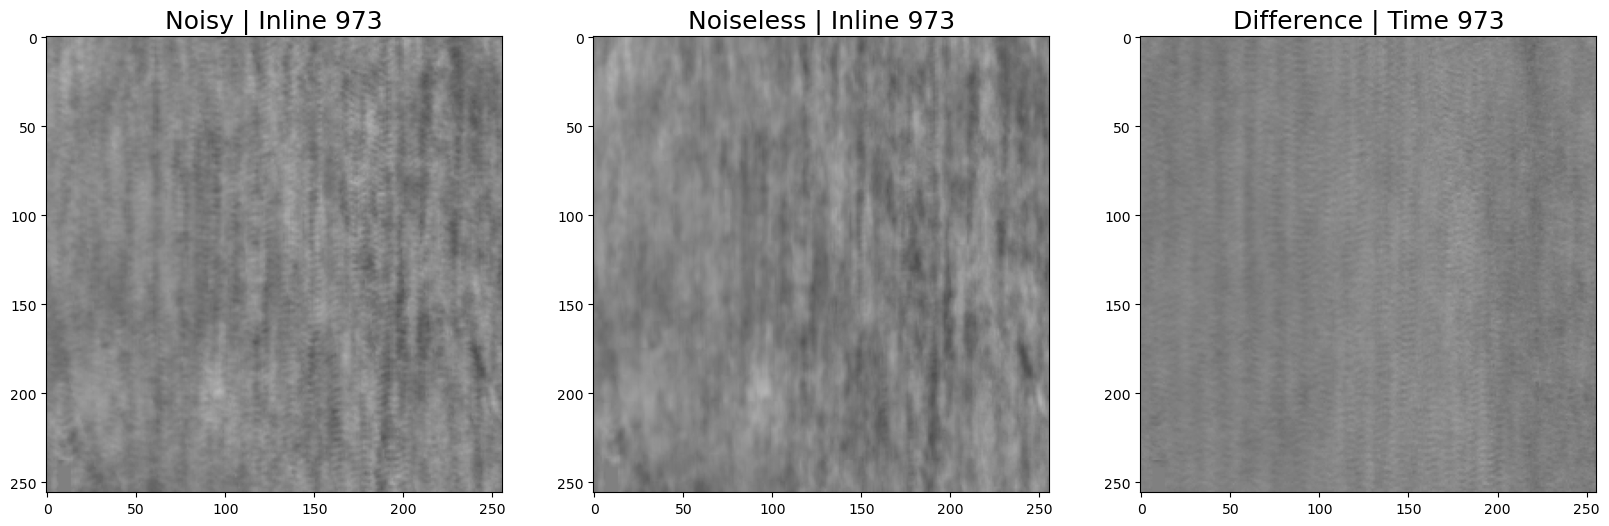

In [122]:
# Make a 1 row 3 column plot. 1st plot in the noisy inline, 2nd plot is the noiseless inline, 3rd plot is the difference between the two
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(time_noisy_patches[random_time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[0].set_title('Noisy | Inline %d' %random_time, fontsize = 18)
axs[1].imshow(time_noiseless_patches[random_time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[1].set_title('Noiseless | Inline %d' %random_time, fontsize = 18)
axs[2].imshow(time_noisy_patches[random_time].T - time_noiseless_patches[random_time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
axs[2].set_title('Difference | Time %d' %random_time, fontsize = 18)
plt.show()

In [123]:
# Save the individual patches as separate .npy arrays
for i in range(len(time_noisy_patches)):
    np.save('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/patches/patches_size_{}/noiseless/time_2D_noiseless/time_2D_noiseless_patch_{}.npy'.format(patchSize, i), time_noiseless_patches[i])